Just testing the functions with different number of models and datasets

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

folder = '/Users/danielferreira/Documents/git/pySETTV/06 - Utility & References/Data'
file = 'player_batting_enriched.csv'
index = 'player_id'
bat = pd.read_csv(folder+'/'+file, index_col=index)
train_2021 = bat[bat['year']==2021]
test_2022 = bat[bat['year']==2022]
test_2023 = bat[bat['year']==2023]
y_train = train_2021['hr_10'].copy()
y_test_1 = test_2022['hr_10'].copy()
y_test_2 = test_2023['hr_10'].copy()

def outputs(model):
    """ Quick function to get outputs in one 2x2 list"""
    return [[model.predict(X_train), model.predict(X_test_1), model.predict(X_test_2)], [model.predict_proba(X_train)[:,1], model.predict_proba(X_test_1)[:,1], model.predict_proba(X_test_2)[:,1]]]

# Model 1 - Logistic Regression without the variable that contains missing
X_train = train_2021[['ab', 'batting_avg','r_total_stolen_base']].copy()
X_test_1 = test_2022[['ab', 'batting_avg','r_total_stolen_base']].copy()
X_test_2 = test_2023[['ab', 'batting_avg','r_total_stolen_base']].copy()
model1 = LogisticRegression()
model1.fit(X_train, y_train)
model1_outputs = outputs(model1)

# Model 2 - KNN
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test_1 = scaler.fit_transform(X_test_1)
X_test_2 = scaler.fit_transform(X_test_2)
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
model2_outputs = outputs(model2)

# Model 3 - Decision Tree
model3 = DecisionTreeClassifier(max_depth=3, min_samples_split=30, min_samples_leaf = 20, max_features=3)
model3.fit(X_train, y_train)
model3_outputs = outputs(model3)

# Model 4 - Random Forest
model4 = RandomForestClassifier(random_state=42)
model4.fit(X_train,y_train)
model4_outputs = outputs(model4)

model_dict = {'Logistic Regression No Imp': model1_outputs, 'KNN': model2_outputs,
              'Decision Tree': model3_outputs, 'Random Forest': model4_outputs }
y_actual = [y_train, y_test_1, y_test_2]

In [2]:
import model_comp as mc 
problem = mc.problem("2022 Home Runs", model_dict, y_actual, ds_list = ['Train_2021', 'Test_2022', 'Test_2023'])

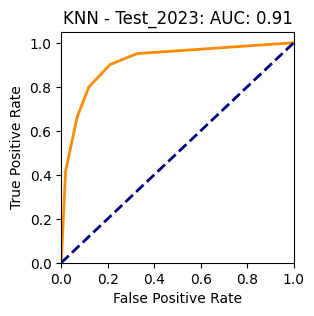

In [4]:
problem.roc_plot('KNN','Test_2023')

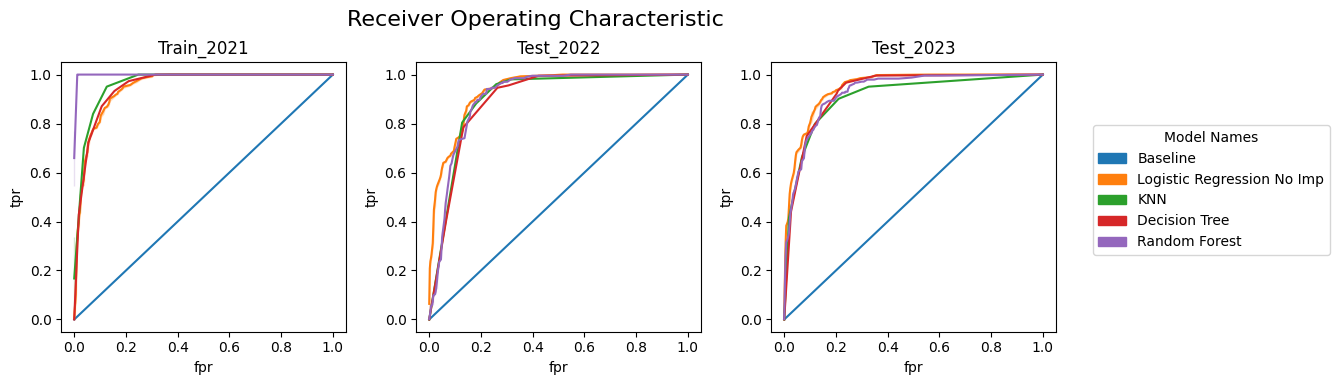

In [5]:
problem.all_roc_plot()

In [6]:
problem.show_roc_auc_table()

,model_name,Test_2022_roc_auc,Test_2023_roc_auc,Train_2021_roc_auc
0,Decision Tree,0.896702,0.930474,0.951007
1,KNN,0.900847,0.909839,0.965248
2,Logistic Regression No Imp,0.933946,0.947618,0.948239
3,Random Forest,0.907704,0.928379,1.000000


In [7]:
problem.show_fit_statistics_table()

,model_name,Test_2022_acc,Test_2022_ase,Test_2022_f1_0,Test_2022_f1_1,Test_2022_log_loss_value,Test_2022_miss,Test_2022_precision_0,Test_2022_precision_1,Test_2022_recall_0,Test_2022_recall_1,Test_2022_roc_auc,Test_2023_acc,Test_2023_ase,Test_2023_f1_0,Test_2023_f1_1,Test_2023_log_loss_value,Test_2023_miss,Test_2023_precision_0,Test_2023_precision_1,Test_2023_recall_0,Test_2023_recall_1,Test_2023_roc_auc,Train_2021_acc,Train_2021_ase,Train_2021_f1_0,Train_2021_f1_1,Train_2021_log_loss_value,Train_2021_miss,Train_2021_precision_0,Train_2021_precision_1,Train_2021_recall_0,Train_2021_recall_1,Train_2021_roc_auc
0,Decision Tree,0.802795,0.125759,0.836129,0.752437,0.428938,0.197205,0.967164,0.624595,0.736364,0.946078,0.896702,0.845907,0.100428,0.863248,0.823529,0.358632,0.154093,0.940994,0.744186,0.797368,0.921811,0.930474,0.886612,0.080190,0.916246,0.824524,0.248282,0.113388,0.939959,0.783133,0.893701,0.870536,0.951007
1,KNN,0.838509,0.122174,0.873786,0.775862,1.899749,0.161491,0.937500,0.692308,0.818182,0.882353,0.900847,0.849117,0.111910,0.876963,0.804979,1.337050,0.150883,0.872396,0.811715,0.881579,0.798354,0.909839,0.900273,0.067923,0.928079,0.837416,0.204159,0.099727,0.928994,0.835556,0.927165,0.839286,0.965248
2,Logistic Regression No Imp,0.854037,0.102356,0.890187,0.782407,0.318521,0.145963,0.915865,0.741228,0.865909,0.828431,0.933946,0.852327,0.093724,0.882653,0.800866,0.294054,0.147673,0.856436,0.844749,0.910526,0.761317,0.947618,0.881148,0.085915,0.915779,0.798144,0.276115,0.118852,0.900952,0.830918,0.931102,0.767857,0.948239
3,Random Forest,0.841615,0.112413,0.878860,0.771300,0.340824,0.158385,0.920398,0.710744,0.840909,0.843137,0.907704,0.844302,0.104165,0.871863,0.801636,0.377782,0.155698,0.875332,0.796748,0.868421,0.806584,0.928379,1.000000,0.013536,1.000000,1.000000,0.074429,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


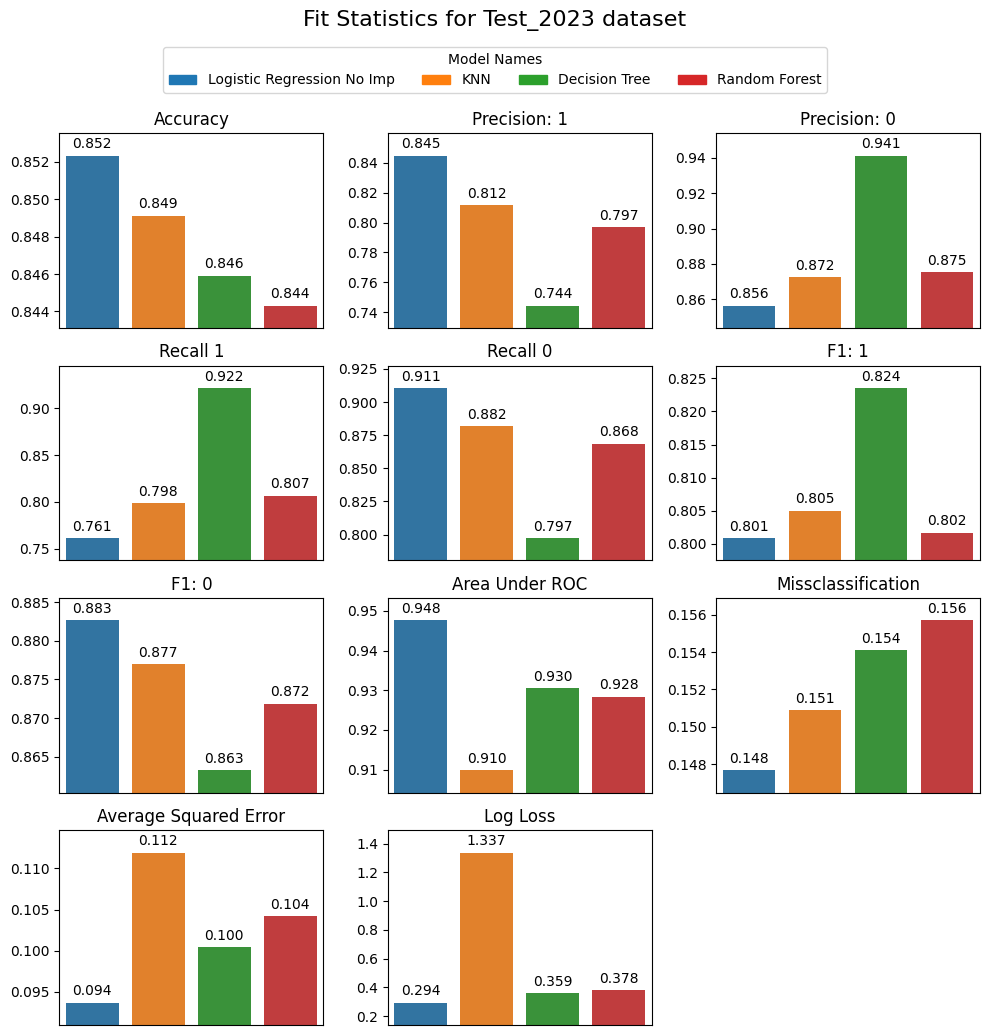

In [8]:
problem.show_fit_statistics_graphs('Test_2023')